<a href="https://colab.research.google.com/github/sunyingjian/study-tensorflow/blob/master/%E5%8D%AB%E6%98%9F%E5%9B%BE%E5%83%8F%E8%AF%86%E5%88%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/dataset"
os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['2_class']

In [57]:
%tensorflow_version 2.x
import tensorflow as tf
print('tensorflow:',format(tf.__version__))
tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib

tensorflow: 2.1.0


In [0]:
data_dir='/content/drive/My Drive/dataset/2_class'

In [0]:
data_root=pathlib.Path(data_dir)

In [60]:
for item in data_root.iterdir():
  print(item)

/content/drive/My Drive/dataset/2_class/airplane
/content/drive/My Drive/dataset/2_class/lake


In [0]:
all_image_path=list(data_root.glob('*/*'))

In [62]:
len(all_image_path)

1400

In [63]:
all_image_path=[str(path) for path in all_image_path]
all_image_path[10:12]

['/content/drive/My Drive/dataset/2_class/airplane/airplane_012.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_013.jpg']

In [0]:
import random
random.shuffle(all_image_path)

In [0]:
image_count=len(all_image_path)

In [66]:
label_names=sorted(item.name for item in data_root.glob('*/'))
label_names

['airplane', 'lake']

In [67]:
label_to_index=dict((name,index) for index,name in enumerate(label_names))
label_to_index

{'airplane': 0, 'lake': 1}

In [68]:
#获取路径来实现对图片做标签,通过下面的代码生成一个pathlib对象,那么他的上一层目录就剩他的label
pathlib.Path('/content/drive/My Drive/dataset/2_class/airplane/airplane_012.jpg').parent.name

'airplane'

In [0]:
#通过推导式 labe_to_index得到分组的编号
all_image_labe=[label_to_index[pathlib.Path(p).parent.name]for p in all_image_path]

In [70]:
all_image_labe[:5]

[0, 0, 1, 1, 1]

In [71]:
all_image_path[:5]

['/content/drive/My Drive/dataset/2_class/airplane/airplane_409.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_644.jpg',
 '/content/drive/My Drive/dataset/2_class/lake/lake_110.jpg',
 '/content/drive/My Drive/dataset/2_class/lake/lake_289.jpg',
 '/content/drive/My Drive/dataset/2_class/lake/lake_426.jpg']

In [0]:
import IPython.display as display
index_to_label=dict((v,k) for k,v in label_to_index.items())
#这样我们就可以通过这个字典获取到 

#真正的代码从下面开始

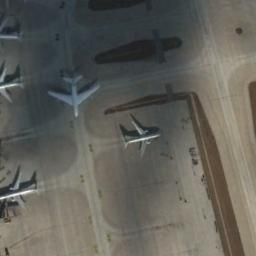

airplane



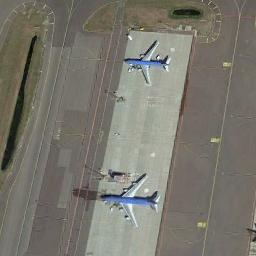

airplane



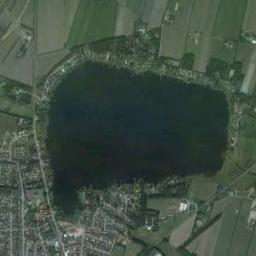

lake



In [73]:
for n in range(3):
  image_index=random.choice(range(len(all_image_path)))
  display.display(display.Image(all_image_path[image_index]))
  print(index_to_label[all_image_labe[image_index]])
  print()

#单张图片的处理过程
##读取图片

In [74]:
#根据路径，读取图片
img_path=all_image_path[0]
img_path
img_raw=tf.io.read_file(img_path)#读取图片
img_raw

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc

##解码图片

In [75]:
#解码图片
image_tensor=tf.image.decode_jpeg(img_raw,channels=3)
image_tensor=tf.image.resize(image_tensor,[256,256])
image_tensor

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[140., 154., 155.],
        [145., 159., 160.],
        [150., 164., 164.],
        ...,
        [201., 212., 204.],
        [146., 157., 149.],
        [232., 243., 235.]],

       [[162., 176., 177.],
        [166., 180., 181.],
        [171., 185., 185.],
        ...,
        [227., 238., 230.],
        [155., 166., 158.],
        [217., 228., 220.]],

       [[175., 189., 189.],
        [179., 193., 193.],
        [184., 198., 198.],
        ...,
        [212., 223., 217.],
        [115., 126., 118.],
        [216., 227., 219.]],

       ...,

       [[172., 179., 171.],
        [169., 176., 168.],
        [168., 175., 167.],
        ...,
        [201., 202., 186.],
        [201., 202., 186.],
        [200., 201., 185.]],

       [[177., 184., 176.],
        [175., 182., 174.],
        [174., 181., 173.],
        ...,
        [201., 202., 186.],
        [201., 202., 186.],
        [200., 201., 185.]],

       [[181., 18

##转换数据类型

In [76]:
image_tensor=tf.cast(image_tensor,tf.float32)#转换数据类型
#图片标准化处理
image_tensor=image_tensor/255
#我们查看下这个图片,看到底是不是范围是0-1
image_tensor.numpy().max()
image_tensor.numpy().min()

0.0

以上呢，是对单一图片的整个处理方式：

1. 读取这张图片

2. 对图片进行解码

3. 转换图片数据类型与标准化


接下来，我们写一个函数来对整个图片数据集进行处理：

In [0]:
def load_preprosess_image(image_path):
  img_raw=tf.io.read_file(img_path)#读取路径
  image_tensor=tf.image.decode_jpeg(img_raw,channels=3)#解码图片,3代表解析的是彩色图片
  #image_tensor=tf.image.resize(image_tensor,256,256)#图片可能会变形,告诉tensorflow大小是256×256
  image_tensor=tf.cast(image_tensor,tf.float32)#转换数据类型
  image_tensor=image_tensor/255#标准化操作
  return image_tensor #返回处理结果

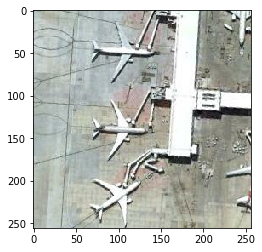

In [78]:
image_path_test=all_image_path[100]
plt.imshow(load_preprosess_image(image_path_test))#调用并画出来

##构造tf.data

In [79]:
path_ds=tf.data.Dataset.from_tensor_slices(all_image_path)
image_dataset=path_ds.map(load_preprosess_image)#建造数据集
image_dataset

<MapDataset shapes: (None, None, 3), types: tf.float32>

In [0]:
#对image_dataset的类型进行转换，我们知道他的图片格式是256×256×3
#为什么他没有显示出来呢

##构造label

In [0]:
label_dataset=tf.data.Dataset.from_tensor_slices(all_image_labe)

##测试下标签

In [82]:
for label in label_dataset:
  print(label)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype

In [83]:
#合并数据
dataset=tf.data.Dataset.zip((image_dataset,label_dataset))
#我们是以元组的形式进行zip的
dataset

<ZipDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int32)>

In [0]:
#划分train与test数据
test_count=int(image_count*0.2)
#必须是个整数所以我们加int
train_count=image_count-test_count

In [0]:
train_dataset=dataset.skip(test_count)
#skip就是掠过的意思
#得到train_dataset的个数
test_dataset=dataset.take(test_count)
#take就是取的意思

In [92]:
BATCH_SIZE=32
train_dataset=train_dataset.shuffle(buffer_size=train_count).batch(BATCH_SIZE)
train_dataset=train_dataset.batch(BATCH_SIZE)
train_dataset

<BatchDataset shapes: ((None, None, None, None, None, None, 3), (None, None, None, None)), types: (tf.float32, tf.int32)>

In [91]:
model=tf,keras.Sequential()
model.add(tf.kears.layers.Conv2D(64,(3,3),
                 input_shape=train_dataset,#有问题
                 activation='relu'))
model.add(tf.kears.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.kears.layers.MaxPooling2D())
model.add(tf.kears.layers.Dropout(0.3))
model.add(tf.kears.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.kears.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.kears.layers.MaxPooling2D())
model.add(tf.kears.layers.Dropout(0.3))
model.add(tf.kears.layers.Conv2D(256,(3,3),activation='relu'))
model.add(tf.kears.layers.Conv2D(256,(3,3),activation='relu'))
model.add(tf.kears.layers.MaxPooling2D())
model.add(tf.kears.layers.Dropout(0.3))
model.add(tf.kears.layers.Conv2D(512,(3,3),activation='relu'))
model.add(tf.kears.layers.Conv2D(512,(3,3),activation='relu'))
model.add(tf.kears.layers.MaxPooling2D())
model.add(tf.kears.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(1024,(3,3),activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

AttributeError: ignored